In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from scipy.optimize import fsolve
from numpy.linalg import inv
import scipy.integrate

In [2]:
def p1(X,mu1):
    return norm.pdf(X,mu1,1)
def p2(X,mu2):
    return norm.pdf(X,mu2,1)
def f(X,lamda,mu1,mu2):
    return (lamda*p1(X,mu1)+(1-lamda)*p2(X,mu2))

In [3]:
N=1000
alpha=0.05
z=norm.ppf(1-alpha/2)
pi=math.pi
F_inverse=[]
H_inverse=[]
lamda_MLE=[]
mu1_MLE=[]
mu2_MLE=[]
for j in range(N):
    n=50
    X=[]
    U=np.random.uniform(0,1,n)
    for i in range(n):
        X.append((fsolve(lambda x: 0.5*norm.cdf(x)+0.5*norm.cdf(x-4)-U[i], 0)[0]))
    def ML(paramlist):
        lamda,mu1,mu2=paramlist[0],paramlist[1],paramlist[2]
        s1=0
        s2=0
        s3=0
        for i in range(n):
            s1=s1-(p1(X[i],mu1)-p2(X[i],mu2))/(f(X[i],lamda,mu1,mu2))
            s2=s2-lamda*p1(X[i],mu1)*(X[i]-mu1)/(f(X[i],lamda,mu1,mu2))
            s3=s3-(1-lamda)*p2(X[i],mu2)*(X[i]-mu2)/(f(X[i],lamda,mu1,mu2))
        return s1,s2,s3
    lamda_hat,mu1_hat,mu2_hat=fsolve(ML,[0.5,0,4])
    lamda_MLE.append(lamda_hat)
    mu1_MLE.append(mu1_hat)
    mu2_MLE.append(mu2_hat)
    h11=0
    h12=0
    h13=0
    h22=0
    h23=0
    h33=0
    for i in range(len(X)):
        h11=h11+(1/n)*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat))**2/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h12=h12-(1/n)*(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat)))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h13=h13-(1/n)*(-p2(X[i],mu2_hat)*(X[i]-mu2_hat)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat)*(p1(X[i],mu1_hat)-p2(X[i],mu2_hat)))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h22=h22-(1/n)*(lamda_hat*p1(X[i],mu1_hat)*(-1+(X[i]-mu1_hat)**2)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat)**2)/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h33=h33-(1/n)*((1-lamda_hat)*p2(X[i],mu2_hat)*(-1+(X[i]-mu2_hat)**2)*f(X[i],lamda_hat,mu1_hat,mu2_hat)-(p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat))**2)/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
        h23=h23+(1/n)*(p1(X[i],mu1_hat)*(X[i]-mu1_hat)*lamda_hat*p2(X[i],mu2_hat)*(X[i]-mu2_hat)*(1-lamda_hat))/(f(X[i],lamda_hat,mu1_hat,mu2_hat))**2
    H=[[h11,h12,h13],[h12,h22,h23],[h13,h23,h33]]
    a11= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
    a22= lambda x:(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
    a33= lambda x:((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))**2/f(x,lamda_hat,mu1_hat,mu2_hat)
    a12= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))*(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
    a13= lambda x:(p1(x,mu1_hat)-p2(x,mu2_hat))*((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
    a23 = lambda x:(lamda_hat*(x-mu1_hat)*p1(x,mu1_hat))*((1-lamda_hat)*(x-mu2_hat)*p2(x,mu2_hat))/f(x,lamda_hat,mu1_hat,mu2_hat)
    f11 = scipy.integrate.quad(a11, -35, 35)[0]
    f22 = scipy.integrate.quad(a22, -35, 35)[0]
    f33 = scipy.integrate.quad(a33, -35, 35)[0]
    f12 = scipy.integrate.quad(a12, -35, 35)[0]
    f13 = scipy.integrate.quad(a13, -35, 35)[0]
    f23 = scipy.integrate.quad(a23, -35, 35)[0]
    F=[[f11,f12,f13],[f12,f22,f23],[f13,f23,f33]]
    F_inverse.append(inv(F))
    H_inverse.append(inv(H))

In [4]:
ff=0
hh=0
for i in range(N):
    ff=ff+F_inverse[i]
    hh=hh+H_inverse[i]

In [5]:
from numpy import linalg as LA

In [6]:
F_inverse_bar=ff/N

In [7]:
H_inverse_bar=hh/N

In [8]:
v11=np.cov(lamda_MLE,mu1_MLE)[0][0]*50
v12=np.cov(lamda_MLE,mu1_MLE)[0][1]*50
v22=np.cov(lamda_MLE,mu1_MLE)[1][1]*50
v13=np.cov(lamda_MLE,mu2_MLE)[0][1]*50
v33=np.cov(lamda_MLE,mu2_MLE)[1][1]*50
v23=np.cov(mu1_MLE,mu2_MLE)[0][1]*50

In [9]:
V=[[v11,v12,v13],[v12,v22,v23],[v13,v23,v33]]

In [10]:
V

[[0.2593563829988734, 0.1351738950421523, 0.10438236829554044],
 [0.1351738950421523, 2.4978738573087784, 0.4428416246448229],
 [0.10438236829554044, 0.4428416246448229, 2.5494805296221688]]

In [11]:
dF=[]
dH=[]
for i in range(len(F_inverse)):
    dF.append(LA.norm(F_inverse[i]-V))
    dH.append(LA.norm(H_inverse[i]-V))


In [12]:
mF=np.argsort(dF)[len(dF)//2]
mH=np.argsort(dH)[len(dH)//2]

In [13]:
F_inverse[mF]

array([[0.26210694, 0.0570475 , 0.0660198 ],
       [0.0570475 , 2.08852498, 0.25904829],
       [0.0660198 , 0.25904829, 2.51265086]])

In [14]:
H_inverse[mH]

array([[0.26161435, 0.07209375, 0.07707741],
       [0.07209375, 1.97441545, 0.24972785],
       [0.07707741, 0.24972785, 2.78635537]])

In [15]:
gh11=[]
gf11=[]
gh22=[]
gf22=[]
gh33=[]
gf33=[]
for i in range(1000):
    gh11.append(2*norm.cdf(z*(H_inverse[i][0][0]/v11)**0.5)-1)
    gf11.append(2*norm.cdf(z*(F_inverse[i][0][0]/v11)**0.5)-1)
    gh22.append(2*norm.cdf(z*(H_inverse[i][1][1]/v22)**0.5)-1)
    gf22.append(2*norm.cdf(z*(F_inverse[i][1][1]/v22)**0.5)-1)
    gh33.append(2*norm.cdf(z*(H_inverse[i][2][2]/v33)**0.5)-1)
    gf33.append(2*norm.cdf(z*(F_inverse[i][2][2]/v33)**0.5)-1)
    

In [16]:
1-gh11[80]

0.039418885585130514

In [17]:
1-gh22[80]

0.031043459271727247

In [18]:
1-gh33[80]

0.06417912817383797

In [19]:
1-gf11[80]

0.04198059142951194

In [20]:
1-gf22[80]

0.038726770392611076

In [21]:
1-gf33[80]

0.06456487782101061

In [22]:
MSEh11=np.mean((gh11-np.asarray(0.95))**2)
MSEf11=np.mean((gf11-np.asarray(0.95))**2)
print(MSEh11)
print(MSEf11)
print(MSEh11/MSEf11)

8.119194848922831e-05
6.364782891495627e-05
1.2756436452485096


In [23]:
MSEh22=np.mean((gh22-np.asarray(0.95))**2)
MSEf22=np.mean((gf22-np.asarray(0.95))**2)
print(MSEh22)
print(MSEf22)
print(MSEh22/MSEf22)

0.00046897224121011054
0.00038500725747076675
1.2180867557950363


In [24]:
MSEh33=np.mean((gh33-np.asarray(0.95))**2)
MSEf33=np.mean((gf33-np.asarray(0.95))**2)
print(MSEh33)
print(MSEf33)
print(MSEh33/MSEf33)

0.0005706810343386058
0.00046663924076948955
1.222959803803793


In [25]:
np.mean(lamda_MLE)

0.4971020220087763

In [26]:
chi_F=[]
chi_H=[]
chi_V=[]
for i in range(1000):
    theta=[[lamda_MLE[i]-0.5,mu1_MLE[i]-0.0,mu2_MLE[i]-4]]
    chi_V.append(np.dot(theta,np.dot(n*inv(V),np.transpose(theta))))
    chi_H.append(np.dot(theta,np.dot(n*inv(H_inverse[i]),np.transpose(theta))))
    chi_F.append(np.dot(theta,np.dot(n*inv(F_inverse[i]),np.transpose(theta))))

In [41]:
chi_F

[array([[0.66934355]]),
 array([[3.00717421]]),
 array([[3.39431109]]),
 array([[2.21135378]]),
 array([[0.6791652]]),
 array([[4.84882812]]),
 array([[7.78449814]]),
 array([[6.51532295]]),
 array([[0.41655735]]),
 array([[5.48303778]]),
 array([[1.34595555]]),
 array([[2.57356075]]),
 array([[3.70380773]]),
 array([[2.5764567]]),
 array([[5.02272659]]),
 array([[2.43770585]]),
 array([[4.57587729]]),
 array([[2.40095257]]),
 array([[2.97983604]]),
 array([[1.37970866]]),
 array([[3.72617842]]),
 array([[1.2059769]]),
 array([[3.08839727]]),
 array([[1.21972691]]),
 array([[4.07263904]]),
 array([[6.01548447]]),
 array([[0.83148055]]),
 array([[2.60858824]]),
 array([[6.52344652]]),
 array([[5.22443535]]),
 array([[3.24824146]]),
 array([[2.25826528]]),
 array([[3.27131122]]),
 array([[2.82219584]]),
 array([[4.20388412]]),
 array([[2.249023]]),
 array([[0.62930383]]),
 array([[0.25226388]]),
 array([[0.80481998]]),
 array([[2.83960866]]),
 array([[0.95009491]]),
 array([[0.77710452]]

In [27]:
np.mean(chi_V)

2.9992780676048474

In [28]:
np.mean(chi_F)

3.024343606298609

In [29]:
np.mean(chi_H)

3.0196827704657783

In [30]:
from scipy.stats import chi2

In [31]:
p_chi_v=[]
p_chi_f=[]
p_chi_h=[]
for i in range(len(chi_V)):
    p_chi_v.append(1-chi2.cdf(chi_V[i], 3, loc=0, scale=1))
    p_chi_f.append(1-chi2.cdf(chi_F[i], 3, loc=0, scale=1))
    p_chi_h.append(1-chi2.cdf(chi_H[i], 3, loc=0, scale=1))

In [33]:
p_chi_f[80]

array([[0.91097428]])

In [34]:
from matplotlib.pyplot import plot

In [35]:
x_v=[]
x_f=[]
x_h=[]
for i in range(len(chi_V)):
    x_v.append(chi_V[i][0][0])
    x_f.append(chi_F[i][0][0])
    x_h.append(chi_H[i][0][0])

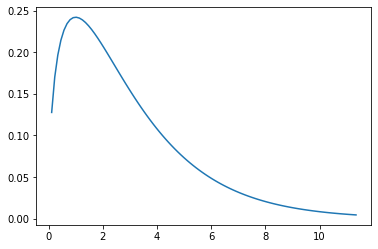

In [36]:
import matplotlib.pyplot as plt

x = np.linspace(chi2.ppf(0.01, 3),chi2.ppf(0.99, 3), 100)
plt.plot(x, chi2.pdf(x, 3))
plt.show()

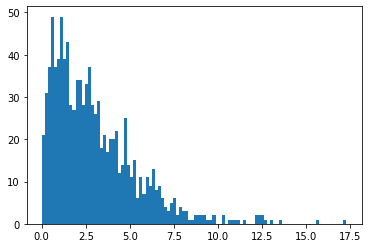

In [37]:
plt.hist(x_v, bins = 100)
plt.show()

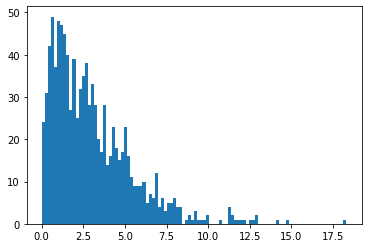

In [38]:
plt.hist(x_f, bins = 100)
plt.show()

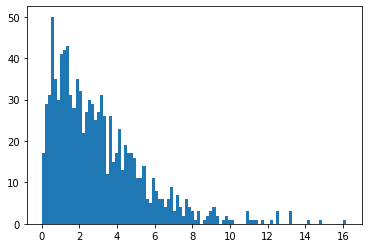

In [39]:
plt.hist(x_h, bins = 100)
plt.show()

In [40]:
lamda_MLE

[0.5133054853874495,
 0.5179437637769512,
 0.4986879512979423,
 0.46254400088546066,
 0.5549955642445327,
 0.6231370379113772,
 0.4703546715052894,
 0.33472608643569257,
 0.5393802706693706,
 0.3975021377159374,
 0.526938448194533,
 0.565667620096696,
 0.5443740429689781,
 0.5474076918501416,
 0.3629263596021761,
 0.4470393416212856,
 0.5867934593706584,
 0.4972862661636582,
 0.5600465174224954,
 0.41865716668521435,
 0.6163398585584058,
 0.4928779772319195,
 0.45484115307402495,
 0.5310543914364182,
 0.37060952675872927,
 0.6240989472328649,
 0.4646281368399016,
 0.3997441269531206,
 0.5388219772437387,
 0.478411052790792,
 0.523827037695926,
 0.39423553920231386,
 0.4175146872940715,
 0.4370700523856977,
 0.6353508706079469,
 0.5590075734641246,
 0.5132677283222616,
 0.5305831369785566,
 0.48322433206155524,
 0.5706820725153383,
 0.4799941210781682,
 0.4808260985466957,
 0.5131945267331594,
 0.5099960146072439,
 0.5748780843555726,
 0.36355432969794066,
 0.5113739819505906,
 0.568674